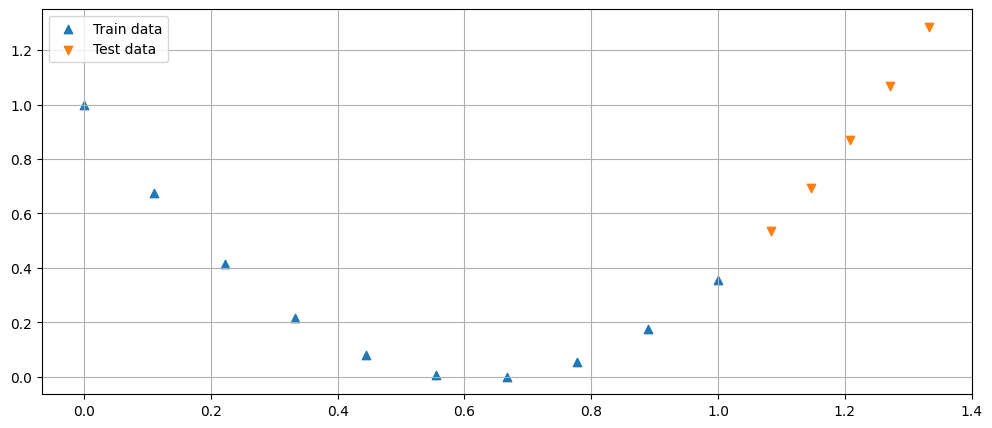

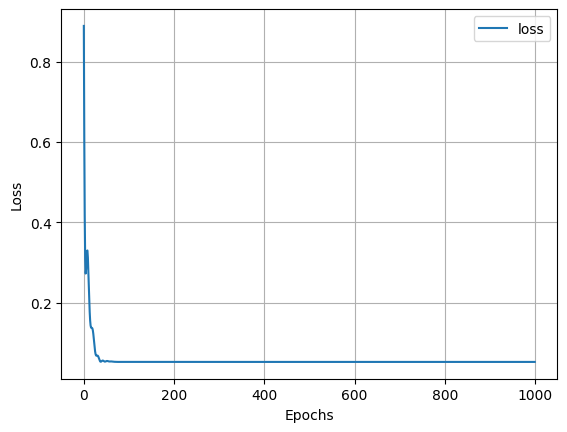

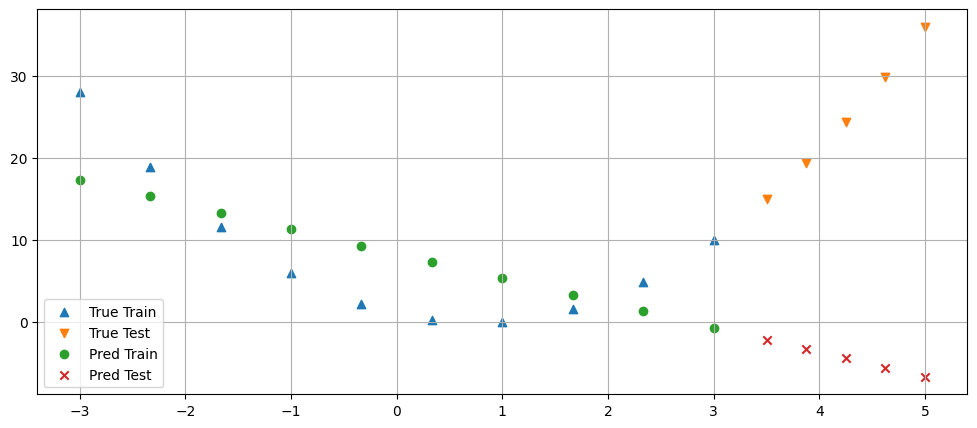

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from nn.Module import Sequential, Linear
from nn.Loss import MSE
from nn.Optimizer import Adam
from nn.Activation import Relu


# Génération de données pour un polynôme de second degré
def generate_quadratic_data(x):
    return 2 * x ** 2 - 3 * x + 1


# Création des points d'entraînement (10 points)
X_train = np.linspace(-3, 3, 10).reshape(-1, 1)
y_train = generate_quadratic_data(X_train)

# Création des points de test (5 points suivants)
X_test = np.linspace(3.5, 5, 5).reshape(-1, 1)
y_test = generate_quadratic_data(X_test)

# Normalisation des données
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)

X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

# Visualisation des données originales
fig = plt.figure(figsize=(12, 5))
plt.scatter(X_train, y_train, marker="^", alpha=1, label="Train data")
plt.scatter(X_test, y_test, marker="v", alpha=1, label="Test data")
plt.grid()
plt.legend()
plt.show()

# Construction du modèle
model = Sequential(
    Linear(1, 4),
    
    Linear(4, 4),
    Linear(4, 1)
)

# Optimizer et Loss
optimizer = Adam(lr=0.01)
loss = MSE()

# Entraînement du modèle
epochs = 1000
loss_values = []
for i in range(epochs):
    model.clear_gradients()
    output = model.forward(X_train)
    loss_value = loss.forward(output, y_train)
    loss_values.append(loss_value)
    grad = loss.backward(output, y_train)
    model.backward(grad)
    model.average_gradients(X_train.shape[0])
    optimizer.step(model)

# Visualisation de la perte
plt.plot(loss_values, label="loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Prédiction sur les points d'entraînement et de test
pred_train = model(X_train)
pred_test = model(X_test)

# Inverser la normalisation
pred_train = scaler_y.inverse_transform(pred_train)
pred_test = scaler_y.inverse_transform(pred_test)

# Visualisation des résultats
fig = plt.figure(figsize=(12, 5))
plt.scatter(scaler_X.inverse_transform(X_train), generate_quadratic_data(scaler_X.inverse_transform(X_train)),
            marker="^", alpha=1, label="True Train")
plt.scatter(scaler_X.inverse_transform(X_test), generate_quadratic_data(scaler_X.inverse_transform(X_test)), marker="v",
            alpha=1, label="True Test")
plt.scatter(scaler_X.inverse_transform(X_train), pred_train, marker="o", alpha=1, label="Pred Train")
plt.scatter(scaler_X.inverse_transform(X_test), pred_test, marker="x", alpha=1, label="Pred Test")
plt.grid()
plt.legend()
plt.show()
